In [1]:
import pandas as pd
import numpy as np
import math
from math import cos , sin
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
import matplotlib
warnings.filterwarnings("ignore")

# Task 1 

In [2]:
def PointsInCircum(r, n=100):
    np.random.seed(42) 
    return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-20, 20),
             math.sin(2*math.pi/n*x)*r + np.random.normal(-20, 20)) for x in range(1, n+1)]

In [5]:
points = PointsInCircum(400, 900)  
points1 = PointsInCircum(250, 600)  
points2 = PointsInCircum(90, 200)  

In [15]:
noise = pd.DataFrame([(np.random.randint(-500, 500), np.random.randint(-500, 500))])

In [16]:
X = points + points1 + points2

In [21]:
X = pd.DataFrame(X)


In [22]:
X

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
1695,51.322030,-21.441608
1696,43.195913,8.159427
1697,93.411208,-35.034660
1698,35.692900,4.250479


In [23]:
X = pd.concat([X, noise])

In [24]:
X.columns = ["Feature1" , "Feature2"]
X

,Feature1,Feature2
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
1696,43.195913,8.159427
1697,93.411208,-35.034660
1698,35.692900,4.250479
1699,67.709203,4.756326


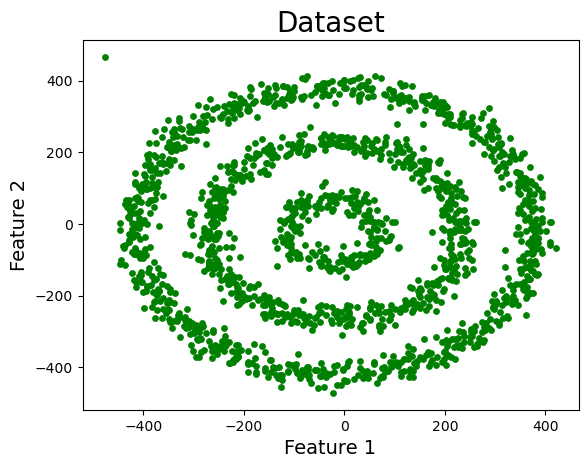

In [28]:
plt.scatter(X["Feature1"], X["Feature2"], s=15, c='g')
plt.title("Dataset", fontsize = 20)
plt.xlabel("Feature 1", fontsize = 14)
plt.ylabel("Feature 2", fontsize=14)
plt.show()

# Task 2

### Applying K-Means Algorithm to cluster the data

In [32]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters= 3, random_state=43)
k_means.fit(X[["Feature1", "Feature2"]]) 

KMeans(n_clusters=3, random_state=43)

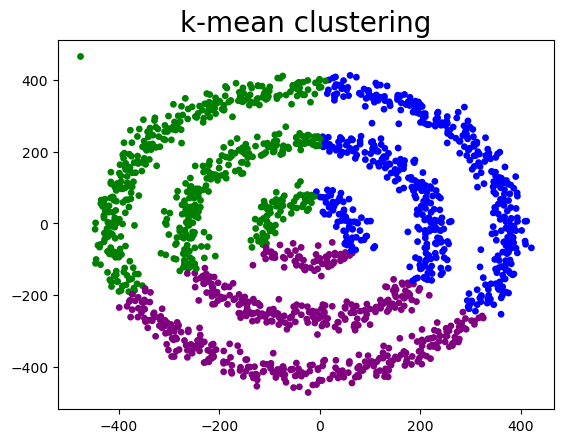

In [34]:
X['Kmean_labels']= k_means.labels_

colors = ["purple","red","blue","green"]

plt.scatter(X["Feature1"], X["Feature2"], c=X["Kmean_labels"], cmap= matplotlib.colors.ListedColormap(colors), s=15)

plt.title("k-mean clustering", fontsize=20)
plt.show()

### Applying default DBSCAN algorithm to cluster the data

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X[["Feature1", "Feature2"]])

DBSCAN()

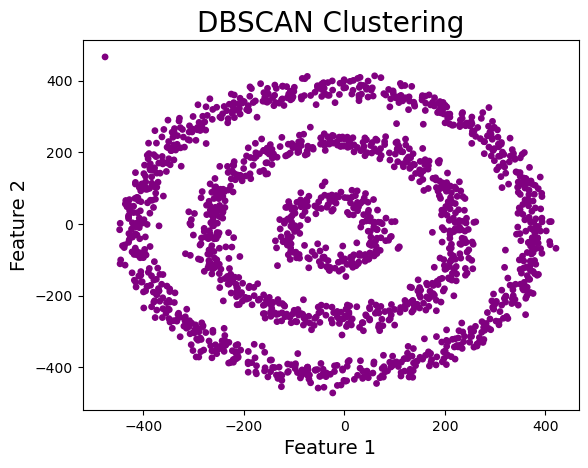

In [36]:
X["DBSCAN_labels"]= dbscan.labels_

plt.scatter(X["Feature1"], X["Feature2"],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)

plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Evaluate the optimum values of Hyperparameters

### Epsilon and Minimum Sample

In [44]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[["Feature1", "Feature2"]])
distances, indices= nbrs.kneighbors(X[["Feature1", "Feature2"]])

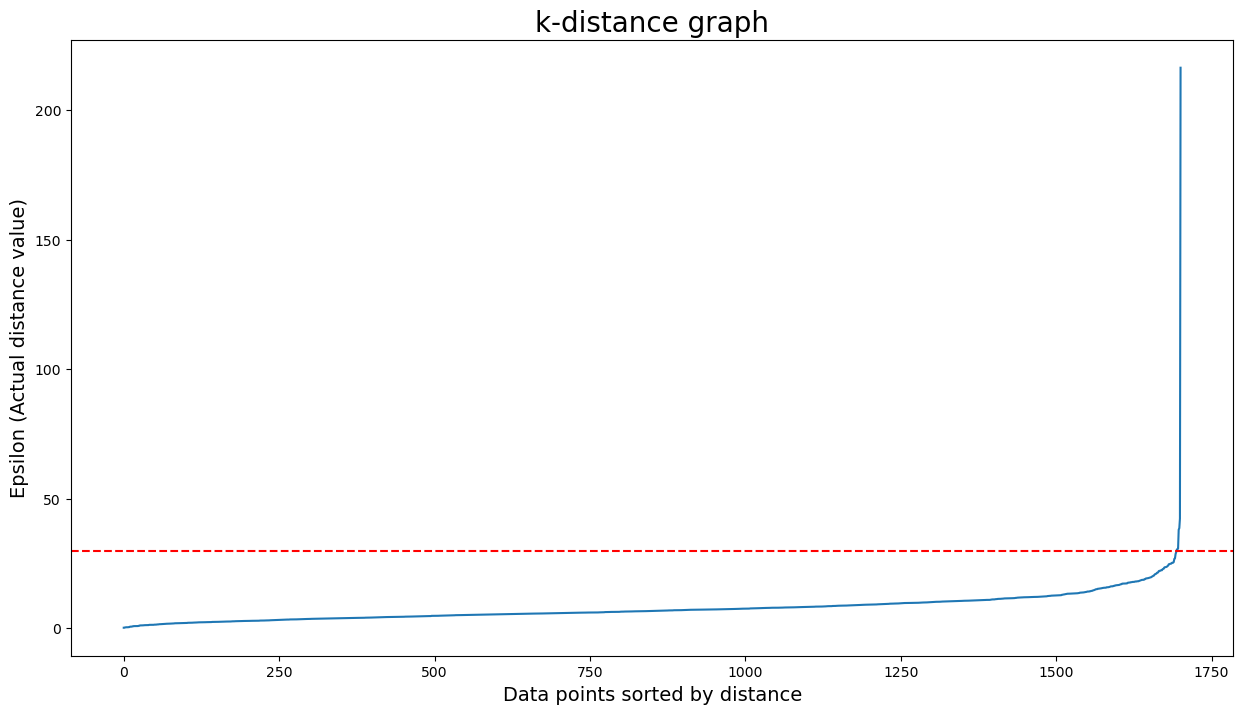

In [45]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=30, color= "r", linestyle ="--")
plt.title("k-distance graph", fontsize=20)
plt.xlabel("Data points sorted by distance", fontsize =14)
plt.ylabel("Epsilon (Actual distance value)", fontsize = 14)
plt.show()

# Applying DBSCAN algorithm with Hyperparameters to cluster the data1
eps_optimum = 20

In [46]:
eps_optimum = 30
for min_samples_list in [10,11,12,13]:
    Clusterer = DBSCAN(eps = eps_optimum, min_samples= min_samples_list)
    Cluster_labels = Clusterer.fit_predict(X)
    #print(Cluster_labels)
    
    x=  Cluster_labels +2 
    y= np.bincount(x)
    
    ii = np.nonzero(y)[0]
    
    results = list(zip(ii,y[ii]))
    #print(results)
    print("eps", eps_optimum, "| min samples =", min_samples_list, "| Number of clusters obtained :", results)

eps 30 | min samples = 10 | Number of clusters obtained : [(1, 32), (2, 685), (3, 194), (4, 592), (5, 198)]
eps 30 | min samples = 11 | Number of clusters obtained : [(1, 42), (2, 682), (3, 134), (4, 58), (5, 589), (6, 196)]
eps 30 | min samples = 12 | Number of clusters obtained : [(1, 54), (2, 269), (3, 177), (4, 228), (5, 133), (6, 58), (7, 587), (8, 195)]
eps 30 | min samples = 13 | Number of clusters obtained : [(1, 73), (2, 266), (3, 126), (4, 50), (5, 70), (6, 155), (7, 128), (8, 55), (9, 564), (10, 21), (11, 193)]


In [51]:
dbscan_opt=DBSCAN(eps=30,min_samples=12)
dbscan_opt.fit(X[["Feature1", "Feature2"]])

DBSCAN(eps=30, min_samples=12)

In [52]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_
X['DBSCAN_opt_labels'].value_counts()


 5    587
 0    269
 2    228
 6    195
 1    177
 3    133
 4     58
-1     54
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.123


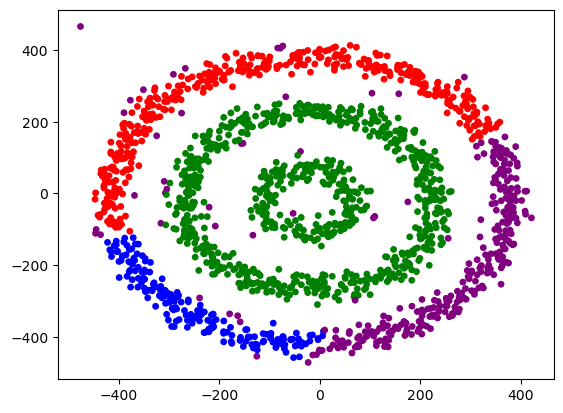

In [53]:
plt.scatter(X["Feature1"], X["Feature2"], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, X['DBSCAN_opt_labels']))